Масалкова Наталья

Домашнее задание по Компьютерному зрению

In [ ]:
# загрузка библиотек
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
import os

from PIL import Image
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from collections import Counter

from google.colab import files, drive

In [ ]:
# подгрузим гугл диск 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# загрузим библиотеку mnist
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()
print(x_train_org.shape)
print(x_test_org.shape)

# нормирование
x_train = x_train_org.astype('float32')
x_test = x_test_org.astype('float32')
x_train = x_train / 255
x_test  = x_test / 255

# разбиение на категории
y_train = utils.to_categorical(y_train_org,10)
y_test = utils.to_categorical(y_test_org,10)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


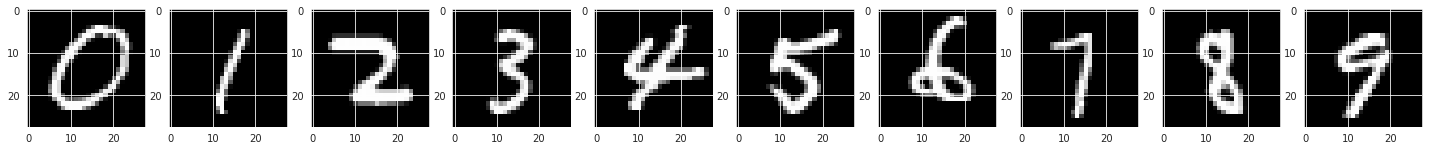

In [ ]:
# выводим для примера картинки из каждого класса
fig, axs = plt.subplots(1, 10, figsize=(25, 3)) 
for i in range(10): 
  label_indexes = np.where(y_train_org==i)[0] 
  index = random.choice(label_indexes) 
  img = x_train_org[index] 
  axs[i].imshow(Image.fromarray(img), cmap='gray') 

plt.show() 

In [ ]:
# меняем форму входных данных для подачи их в нейронную сеть
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [ ]:
# сделаем нейронную сеть

model = Sequential()
model.add(BatchNormalization(input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/15
375/375 [==============================] - 38s 21ms/step - loss: 0.3379 - accuracy: 0.9064 - val_loss: 0.4126 - val_accuracy: 0.9736
Epoch 2/15
375/375 [==============================] - 7s 20ms/step - loss: 0.0834 - accuracy: 0.9773 - val_loss: 0.0667 - val_accuracy: 0.9818
Epoch 3/15
375/375 [==============================] - 7s 20ms/step - loss: 0.0556 - accuracy: 0.9847 - val_loss: 0.0537 - val_accuracy: 0.9841
Epoch 4/15
375/375 [==============================] - 7s 20ms/step - loss: 0.0416 - accuracy: 0.9888 - val_loss: 0.0537 - val_accuracy: 0.9839
Epoch 5/15
375/375 [==============================] - 8s 20ms/step - loss: 0.0329 - accuracy: 0.9913 - val_loss: 0.0411 - val_accuracy: 0.9866
Epoch 6/15
375/375 [==============================] - 7s 20ms/step - loss: 0.0276 - accuracy: 0.9928 - val_loss: 0.0394 - val_accuracy: 0.9881
Epoch 7/15
375/375 [==============================] - 7s 20ms/step - loss: 0.0230 - accuracy: 0.9941 - val_loss: 0.0364 - val_accuracy: 0.988

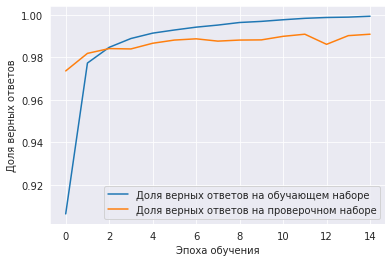

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size=128, 
                    epochs=15,
                    validation_split=0.2,
                    verbose=1)


plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

На проверочном наборе точность с 6-8 эпохи уже не особо растет, поэтому 15 эпох для обучения достаточно

In [ ]:
# определение цифр из тестовой выборки
n = np.random.randint(x_test.shape[0])
prediction = model.predict(x_test)

print("Выход сети: ", prediction[n])
print("Распознанная цифра: ", np.argmax(prediction[n]))
print("Верный ответ: ", np.argmax(y_test[n]))

Выход сети:  [5.7160810e-06 9.9927384e-01 1.4540795e-05 2.7038575e-06 1.4136989e-06
 1.6944523e-07 2.4878927e-08 6.4776844e-04 4.1457923e-07 5.3433530e-05]
Распознанная цифра:  1
Верный ответ:  1


In [ ]:
ev_test = model.evaluate(x_test, y_test)
print('Точность на тестовой', ev_test[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0254 - accuracy: 0.9913
Точность на тестовой 0.9912999868392944


In [ ]:
prediction_test = model.predict(x_test)
prediction_test = np.argmax(prediction_test, axis=1)
mask_test = prediction_test == y_test_org

prediction = model.predict(x_train)
prediction = np.argmax(prediction, axis=1)
mask_train = prediction == y_train_org

In [ ]:
#выводим индексы, которые должны получиться и которые мы предсказали
print(prediction_test[:20])
print(y_test_org[:20].flatten())

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [ ]:
#выведем маску, True - совпадение, False - сетка ошиблась в распозновании картинки
print(mask_test.shape)
print(mask_test[:100])

(10000,)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [ ]:
#решейпим в плоское пространство
y_train_reshape = y_train_org.flatten()
y_test_reshape = y_test_org.flatten()

In [ ]:
count_y_train = Counter(y_train_reshape)
count_y_test = Counter(y_test_reshape)

In [ ]:
count_err_train = Counter(y_train_reshape[mask_train])
count_err_test = Counter(y_test_reshape[mask_test])

In [ ]:
# Процент правильно распознанных
print('----------правильные распознавания-------')
print('     класс :  обучающая  :   тестовая')
for i in range(10):
  #print(classes[i],':',count_err[i])
  print(f'{i:>10} :{round(100*count_err_train[i]/count_y_train[i],2):10}%  : {round(100*count_err_test[i]/count_y_test[i],2):10}%')

----------правильные распознавания-------
     класс :  обучающая  :   тестовая
         0 :     99.86%  :      99.59%
         1 :      99.9%  :      99.82%
         2 :     99.95%  :      99.52%
         3 :      99.8%  :      99.31%
         4 :     99.62%  :      98.17%
         5 :     99.63%  :       99.1%
         6 :     99.93%  :      98.96%
         7 :     99.68%  :      98.15%
         8 :     99.79%  :      99.49%
         9 :     99.71%  :      99.11%


Получили хорошее распознавание рукописных цифр из базы mnist

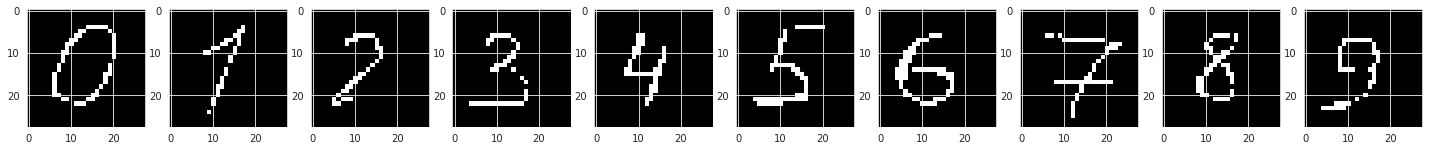

In [ ]:
img_height = 28
img_width = 28

fig, axs = plt.subplots(1, 10, figsize=(25, 5)) 
for i in range(10): 
  car_path = '/content/' + str(i) + '.jpg'
  img_path = car_path
  axs[i].imshow(image.load_img(img_path, target_size=(img_height, img_width)))
  x = image.load_img(img_path, target_size=(img_height, img_width))

plt.show() 

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
for i in range(10):

  imi = Image.open('/content/' + str(i) + '.jpg').convert('L')
  imi = imi.resize((28, 28), Image.ANTIALIAS)
  imi = np.array(imi).reshape(1, 28, 28, 1)
  print(imi.shape)
  imi = imi.astype('float32')
  imi = imi / 255
  prediction = model.predict(imi)

  print("Выход сети: ", prediction)
  print("Распознанная цифра: ", np.argmax(prediction))
  print("Правильная цифра:", i)

(1, 28, 28, 1)
Выход сети:  [[9.7013861e-01 2.2721560e-04 2.5276472e-03 2.6410447e-05 2.2208671e-05
  4.9694634e-05 5.1846276e-03 3.7956855e-04 3.0888931e-03 1.8355215e-02]]
Распознанная цифра:  0
Правильная цифра: 0
(1, 28, 28, 1)
Выход сети:  [[5.1024612e-03 7.6520360e-01 4.1530922e-02 2.4053584e-04 8.7624067e-05
  9.8432659e-04 7.5946227e-05 1.7045680e-01 2.9008198e-03 1.3416983e-02]]
Распознанная цифра:  1
Правильная цифра: 1
(1, 28, 28, 1)
Выход сети:  [[2.4768693e-04 3.6163260e-03 9.9425793e-01 2.6806882e-05 1.3137083e-07
  6.4987483e-07 1.1147453e-06 4.6904702e-04 1.2977743e-03 8.2549115e-05]]
Распознанная цифра:  2
Правильная цифра: 2
(1, 28, 28, 1)
Выход сети:  [[1.6337541e-06 4.7094585e-05 9.8961587e-05 9.9959832e-01 6.3629791e-08
  1.6606077e-04 8.7657085e-08 2.5230993e-06 1.3785696e-06 8.3900835e-05]]
Распознанная цифра:  3
Правильная цифра: 3
(1, 28, 28, 1)
Выход сети:  [[9.1565735e-06 1.4959327e-03 9.4831643e-07 1.0626080e-06 9.9765706e-01
  5.1265382e-05 1.6727066e-05 4.

Все верно распознает

Упростим нейронную сеть оставив по одному сверточному фильтру

In [ ]:
# сделаем нейронную сеть

model = Sequential()
model.add(BatchNormalization(input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 3136)             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/15
375/375 [==============================] - 5s 11ms/step - loss: 0.4560 - accuracy: 0.8673 - val_loss: 0.3862 - val_accuracy: 0.9495
Epoch 2/15
375/375 [==============================] - 4s 10ms/step - loss: 0.1441 - accuracy: 0.9609 - val_loss: 0.1069 - val_accuracy: 0.9728
Epoch 3/15
375/375 [==============================] - 4s 10ms/step - loss: 0.0958 - accuracy: 0.9736 - val_loss: 0.0806 - val_accuracy: 0.9781
Epoch 4/15
375/375 [==============================] - 4s 10ms/step - loss: 0.0730 - accuracy: 0.9800 - val_loss: 0.0683 - val_accuracy: 0.9810
Epoch 5/15
375/375 [==============================] - 4s 11ms/step - loss: 0.0593 - accuracy: 0.9834 - val_loss: 0.0599 - val_accuracy: 0.9819
Epoch 6/15
375/375 [==============================] - 4s 10ms/step - loss: 0.0500 - accuracy: 0.9862 - val_loss: 0.0530 - val_accuracy: 0.9847
Epoch 7/15
375/375 [==============================] - 4s 10ms/step - loss: 0.0428 - accuracy: 0.9885 - val_loss: 0.0491 - val_accuracy: 0.9852

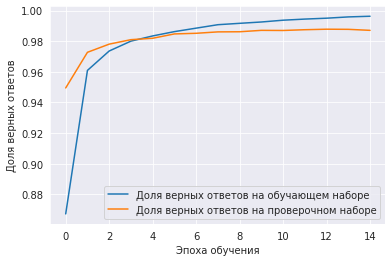

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size=128, 
                    epochs=15,
                    validation_split=0.2,
                    verbose=1)


plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
for i in range(10):

  imi = Image.open('/content/' + str(i) + '.jpg').convert('L')
  imi = imi.resize((28, 28), Image.ANTIALIAS)
  imi = np.array(imi).reshape(1, 28, 28, 1)
  print(imi.shape)
  imi = imi.astype('float32')
  imi = imi / 255
  prediction = model.predict(imi)

  print("Выход сети: ", prediction)
  print("Распознанная цифра: ", np.argmax(prediction))
  print("Правильная цифра:", i)

(1, 28, 28, 1)
Выход сети:  [[9.90702510e-01 1.02630685e-04 1.97857711e-03 8.64470276e-05
  1.27860312e-05 4.29958563e-05 6.72179088e-03 1.26896091e-04
  2.44555340e-05 2.01042712e-04]]
Распознанная цифра:  0
Правильная цифра: 0
(1, 28, 28, 1)
Выход сети:  [[3.7078031e-03 9.7273356e-01 4.2632655e-03 4.5017982e-04 3.7467395e-05
  1.1313052e-03 3.1682564e-05 1.6188765e-02 1.7225601e-04 1.2837291e-03]]
Распознанная цифра:  1
Правильная цифра: 1
(1, 28, 28, 1)
Выход сети:  [[1.5145834e-03 1.9282874e-02 9.7363776e-01 1.2402101e-03 2.4684294e-07
  7.3182546e-06 2.5917925e-06 4.2501530e-03 3.3924149e-05 3.0338037e-05]]
Распознанная цифра:  2
Правильная цифра: 2
(1, 28, 28, 1)
Выход сети:  [[1.4155693e-06 3.1962135e-04 8.7101271e-06 9.9927515e-01 1.6561766e-07
  3.7871729e-04 2.8426203e-07 9.3992294e-06 2.5886266e-08 6.5615941e-06]]
Распознанная цифра:  3
Правильная цифра: 3
(1, 28, 28, 1)
Выход сети:  [[1.1015331e-03 2.0650050e-02 2.1304540e-05 3.1735724e-06 9.7226834e-01
  5.9280248e-04 1.54

Отлично распознает наши рукописные цифры